### Classification models applied to Bike Buyers dataset

#### libraries

In [ ]:
#Importing all needed libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold, RandomizedSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



#### loading dataset

In [3]:
#load dataset
data= dataset=pd.read_csv("bike_buyers.csv")
dataset.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


#### Feature and target

In [4]:
#separate data into feature and target
#target is the purchased bike and features are all other columns except for the target

target_column = 'Purchased Bike'   
features = data.drop(columns=[target_column])
target = data[target_column]

display("Features:", features.head())
display("Target:", target.head())

'Features:'

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0


'Target:'

0     No
1     No
2     No
3    Yes
4    Yes
Name: Purchased Bike, dtype: object

#### Checking for missing values and descriptive statistics

In [5]:
# Data preprocessing
# Check for sum of missing values in each column
print("Missing values in each column:\n", data.isnull().sum())

# Identify inconsistent or unusual data 
print("\nSummary descriptive statistics for numerical features:\n", data.describe())


Missing values in each column:
 ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

Summary descriptive statistics for numerical features:
                  ID         Income    Children        Cars         Age
count   1000.000000     994.000000  992.000000  991.000000  992.000000
mean   19965.992000   56267.605634    1.910282    1.455096   44.181452
std     5347.333948   31067.817462    1.626910    1.121755   11.362007
min    11000.000000   10000.000000    0.000000    0.000000   25.000000
25%    15290.750000   30000.000000    0.000000    1.000000   35.000000
50%    19744.000000   60000.000000    2.000000    1.000000   43.000000
75%    24470.750000   70000.000000    3.000000    2.000000   52.000000
max    29447.000000  170000.000

#### Handling missing values

In [6]:
# Fill missing numerical values with the median
numerical_cols = ['Income', 'Children', 'Cars', 'Age']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing categorical values with the mode
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# check there are no missing values
print("\nMissing values after modification:\n", data.isnull().sum())



Missing values after modification:
 ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


#### One hot encoding

In [7]:
# Perform one-hot encoding to change categorical data into numeric
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nData after one-hot encoding:\n", data_encoded.head())



Data after one-hot encoding:
       ID   Income  Children  Cars   Age Purchased Bike  Gender_Male  \
0  12496  40000.0       1.0   0.0  42.0             No        False   
1  24107  30000.0       3.0   1.0  43.0             No         True   
2  14177  80000.0       5.0   2.0  60.0             No         True   
3  24381  70000.0       0.0   1.0  41.0            Yes         True   
4  25597  30000.0       0.0   0.0  36.0            Yes         True   

   Marital Status_Single  Education_Graduate Degree  Education_High School  \
0                  False                      False                  False   
1                  False                      False                  False   
2                  False                      False                  False   
3                   True                      False                  False   
4                   True                      False                  False   

   ...  Occupation_Manual  Occupation_Professional  Occupation_Skilled Ma

#### Separating data into feature and target after encoding and splitting data into train test sets

In [8]:
# Separate features and target from encoded dataset
X = data_encoded.drop(columns=[target_column])  
#encode target as binary
y = data_encoded[target_column].apply(lambda x: 1 if x == 'Yes' else 0)  

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Machine learning algorithms
#### Classification models (Logistic regression, Decision tree, Random forest classifier, and SVM)

In [9]:
#Train machine learning models and evaluate performance
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}


results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Display performance metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# Display comparison of accuracies
print("\nModel Accuracies:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


Logistic Regression Performance:
Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       106
           1       0.53      0.47      0.50        94

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200


Decision Tree Performance:
Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       106
           1       0.66      0.63      0.64        94

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200


Random Forest Performance:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       106
           1       0.75      0.73      0.74        94

    accuracy                           0.76    

### Hyperparameter tuning to random forest and desision tree


In [10]:
# Set up Stratified K-Fold as cv for consistent cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


##### Random foreest tuning using RandomizedSearchCV combined with Stratified K-fold cross validation

In [11]:
# parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [100, 150],  
    "max_depth": [10, 15, None],  
    "min_samples_split": [2, 5],  
    "min_samples_leaf": [1, 2],  
    "max_features": ["sqrt", "log2"], 
    "criterion": ["gini"]  
}

rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with StratifiedKFold
random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid_rf, 
    n_iter=50,  
    cv=cv, 
    scoring="accuracy", 
    n_jobs=-1, 
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train, y_train)


# Evaluate on test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Performance after Randomized Search:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Random Forest Performance after Randomized Search:
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       106
           1       0.76      0.74      0.75        94

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



#####  Decision tree tuning using GridSearchCV combined with Stratified K-fold cross validation

In [12]:
#  parameter grid for Decision Tree
param_grid_dt = {
    "max_depth": [10, 15, None],  
    "min_samples_split": [2, 5],  
    "min_samples_leaf": [1, 2],  
    "criterion": ["gini", "entropy"]  
}

dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV with StratifiedKFold
grid_search_dt = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid_dt, 
    cv=cv, 
    scoring="accuracy", 
    n_jobs=-1, 
    verbose=2
)
grid_search_dt.fit(X_train, y_train)

# Evaluate on test set
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Performance after Grid Search:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Decision Tree Performance after Grid Search:
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       106
           1       0.66      0.68      0.67        94

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



### Metrics comparison before and after tuning

#### Metrics comparison for decision tree

In [13]:
# Model before tuning (Decision Tree model)
dt = DecisionTreeClassifier(random_state=42)  
dt.fit(X_train, y_train)  
y_pred_before_dt = dt.predict(X_test)  
# For the model before tuning
print("Before Tuning (Decision Tree) Classification Report:")
print(classification_report(y_test, y_pred_before_dt))

# Model after tuning (using GridSearchCV for Decision Tree)
y_pred_after_dt = best_dt.predict(X_test)  
# After hyperparameter tuning with best model
print("After Tuning (Decision Tree) Classification Report:")
print(classification_report(y_test, y_pred_after_dt))


Before Tuning (Decision Tree) Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       106
           1       0.66      0.63      0.64        94

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

After Tuning (Decision Tree) Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       106
           1       0.66      0.68      0.67        94

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



#### Metrics comparison for random forest

In [14]:
# Model before tuning (Random Forest model)
rf = RandomForestClassifier(random_state=42)  
rf.fit(X_train, y_train)  
y_pred_before_rf = rf.predict(X_test) 
# For the model before tuning
print("Before Tuning (Random Forest) Classification Report:")
print(classification_report(y_test, y_pred_before_rf))

# Model after tuning (using RandomizedSearchCV for Random Forest)
y_pred_after_rf = best_rf.predict(X_test)  
# After hyperparameter tuning with best model
print("After Tuning (Random Forest) Classification Report:")
print(classification_report(y_test, y_pred_after_rf))


Before Tuning (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       106
           1       0.75      0.73      0.74        94

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

After Tuning (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       106
           1       0.76      0.74      0.75        94

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



### Confusion matrix

##### Decision tree

Decision Tree - Before Tuning


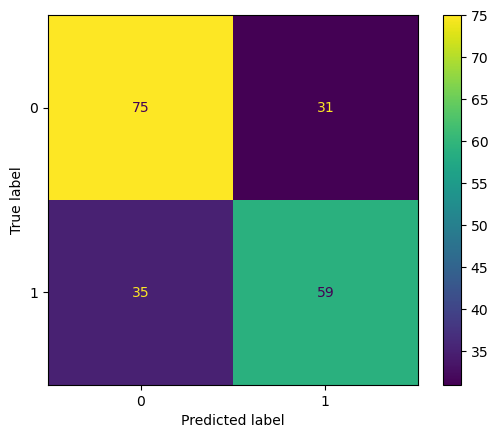

In [ ]:

# Decision Tree confusion matrix (Before and After Tuning)
print("Decision Tree - Before Tuning")
cm_before_dt = confusion_matrix(y_test, y_pred_before_dt)
disp_before_dt = ConfusionMatrixDisplay(confusion_matrix=cm_before_dt)
disp_before_dt.plot()



Decision Tree - After Tuning


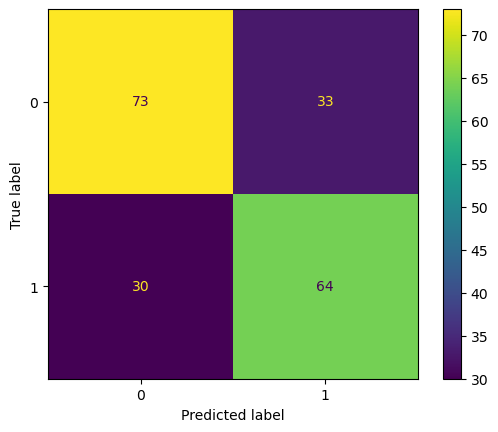

In [18]:
print("Decision Tree - After Tuning")
cm_after_dt = confusion_matrix(y_test, y_pred_after_dt)
disp_after_dt = ConfusionMatrixDisplay(confusion_matrix=cm_after_dt)
disp_after_dt.plot()



#### Random forest

Random Forest - Before Tuning


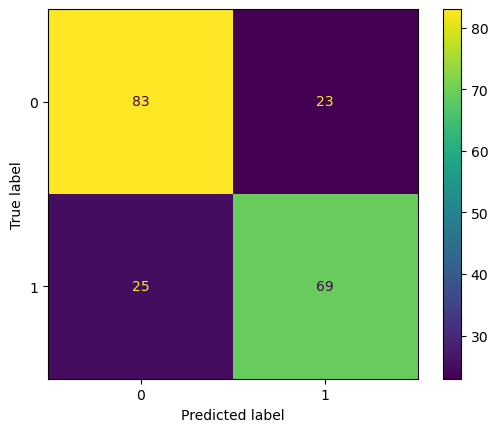

In [19]:
# Random Forest (Before and After Tuning)
print("Random Forest - Before Tuning")
cm_before_rf = confusion_matrix(y_test, y_pred_before_rf)
disp_before_rf = ConfusionMatrixDisplay(confusion_matrix=cm_before_rf)
disp_before_rf.plot()



Random Forest - After Tuning


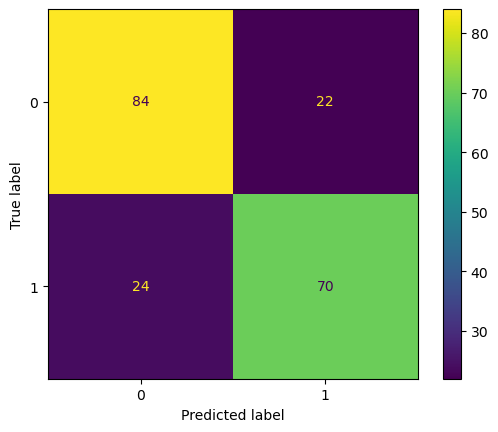

In [20]:
print("Random Forest - After Tuning")
cm_after_rf = confusion_matrix(y_test, y_pred_after_rf)
disp_after_rf = ConfusionMatrixDisplay(confusion_matrix=cm_after_rf)
disp_after_rf.plot()